# 05 Algebra with Sympy, Scipy and Numpy 
# Review Exercises - Solutions





## Review Exercise 1: Root finding 

Fit a polynomial function to the data below.

Find the roots of the fitted polynomial. 

In [3]:
# Review Exercise 1: Root finding 
x = [-6.0, -5.555555555555555, -5.444444444444445, -5.333333333333333, -5.0, -4.777777777777778, -4.555555555555555, -4.333333333333334, -4.111111111111111, -3.555555555555556, -3.3333333333333335, -3.2222222222222223, -2.2222222222222223, -1.8888888888888893, -1.7777777777777777, -1.5555555555555554, -1.4444444444444446, -1.333333333333334, -1.2222222222222223, -1.1111111111111116, -0.7777777777777777, -0.5555555555555562, -0.3333333333333339, -0.22222222222222232, 0.33333333333333304, 0.5555555555555554, 0.6666666666666661, 0.8888888888888884, 1.0, 1.2222222222222214, 1.333333333333333, 1.4444444444444438, 1.666666666666666, 1.7777777777777777, 2.1111111111111107, 2.333333333333332, 2.5555555555555554, 2.777777777777777, 2.8888888888888893, 3.1111111111111107, 3.2222222222222214, 3.5555555555555554, 3.777777777777777, 4.0, 4.111111111111111, 4.222222222222221, 4.333333333333332, 4.444444444444445, 4.8888888888888875, 5.0]
y = [-306.0670724099247, -273.4252575751447, -236.35910170243054, -2.147806809067588, -162.88428946693543, -72.0539258242078, -49.64195238514043, -75.05934686306523, -49.40805793483066, -15.803160491117433, -20.408192287721462, -34.04243919689319, -2.6008654388252075, -0.33819910212586596, 0.5967691522163541, 1.955165125544544, 0.754741501848223, 3.1485956879192134, 0.2736824650635393, 2.535463038423905, 2.0383401626385638, 0.8371085078493934, 0.27326740330999844, -0.14152399821562134, -0.15792222719404883, -1.357836647665497, -4.064496618469092, -2.2060777524379893, -6.716174537753252, -2.381049714701943, -0.8951333867263299, -3.703956978393335, -5.121504730336851, -1.4824097773484555, -0.0658532580151797, 2.5527247901789907, 9.310234512028755, 7.839090794578473, 0.8239015424106111, 27.801254862532222, 33.099581728518, 17.182186572769048, 63.28883410018085, 38.47325866392358, 74.26392095969987, 100.73153613329536, 119.19508682705471, 46.85235728093459, 175.63882495054517, 118.62483544333234]

[-2.71205292  2.45686211  0.02786138]


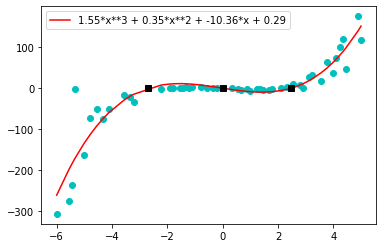

In [5]:
# Review Exercise 1: Root finding 
# Example Solution
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x,y,'co')

# 3rd order polynomial 
# 4 coefficients
c = np.polyfit(x, y, 3)

# 3rd order polynomial 
yfit3 = np.poly1d(c)(x)

# plot fitted function
plt.plot(x, 
         yfit3, 
         'r',
         label=f'{round(c[0],2)}*x**3 + {round(c[1],2)}*x**2 + {round(c[2],2)}*x + {round(c[3],2)}');

plt.legend()

# find roots
r = np.roots(c)
print(r)

#plot roots
z = np.zeros(len(r))                  # array of zeros  
plt.plot(r, z, 'ks')                  # roots

## Review Exercise 2: Root Finding using an Initial Estimate

__Example:__ Find the root of the cosine function that is closest to -5.

<img src="img/cos_graph.png" alt="Drawing" style="width: 500px;"/> 

In [6]:
# Review Exercise 2: Finding the Closest Root to a Point
# Example Solution 
from scipy.optimize import fsolve
print(fsolve(np.cos, -5))

[-4.71238898]


## Review Exercise 3: Systems of Equations
### Example Engineering Application: An Electrical Circuit
<a id='ExampleElectricalCircuit'></a>

#### Kirchhoff's Voltage Law
For a closed loop series path the algebraic sum of all the *voltages* and *voltage drops* around any closed loop in a circuit is equal to zero.

$\sum E - \sum V = 0 $

<img src="img/kirchhoffVoltageLaw.png" alt="Drawing" style="width: 200px;"/> 


#### Electrical Elements Obey Ohm's Law 
The current through a conductor (I, units amps) is the voltage measured across the conductor (V, units volts) divided by the resistance (R, units Ohms).

$$V = IR$$


Consider a three loop current network with five resistors and
two voltage sources.

Here we have three loops, hence we can write three equations
to use resitances R1, R2, R3, R4, R5 and voltages v1, v2, to solve for the three unknowns, the currents: i1, i2, i3.

<img src="img/circuit.png" alt="Drawing" style="width: 400px;"/> 




We can use Kirchoff's voltage law to equate the voltage and voltage drop in each loop: 
<br>$\sum V = \sum E$ 

and Ohm's law : $V=IR$ 

__Loop 1:__ &nbsp; $ (R_1 + R_2) i_1 + i_2 R_2 = v_1$

__Loop 2:__ &nbsp; $ -R_2 i_1 + (R_2 + R_3 + R_4)i_2 - R_4 i_3 = 0$

__Loop 3:__ &nbsp; $ -R_4 i_2 + (R_4 + R_5) i_3 = -v_2$<br>

Putting the equations in matrix form:


\begin{equation*}
\underbrace{
\begin{bmatrix}
(R_1 + R_2) & -R_2 & 0  \\
-R_2        & (R_2 + R_3 + R_4)  & -R_4  \\
0           & -R_4               & (R_4 + R_5)  \\
\end{bmatrix}
}_{\mathbf{R}}
\cdot
\underbrace{
\begin{bmatrix}
i_1 \\
i_2 \\
i_3 \\
\end{bmatrix}
}_{\mathbf{I}}
=\underbrace{
\begin{bmatrix}
v_1 \\
0 \\
-v_2 \\
\end{bmatrix}
}_{\mathbf{V}}
\end{equation*}

Given the following resitance and voltage values,  solve the system of equations to find the three unknown currents: i1, i2, i3.

$R1=1K\Omega$<br>
$R2=300\Omega$<br>
$R3=500\Omega$<br>
$R4=1K\Omega$<br>
$R5=300\Omega$<br>

$v1 = 2V$<br>
$v2 = 5V$

In [7]:
# Review Exercise 3: Systems of Equations
# Example Solution
import numpy as np

R1=1000
R2=300
R3=500
R4=1000
R5=300

v1 = 2
v2 = 5

# Arrays for the known values
R = np.array([[(R1+R2),  -R2,          0],
              [ -R2,     (R2+R3+R4),   -R4],
              [ 0,       -R4,          (R4+R5)]])

v = np.array([v1, 0, -v2])


# Solve for u
I = np.linalg.solve(R, v)
print(I)

[ 0.00072615 -0.00352    -0.00655385]


## Review Exercise 4: Symbolic math

$$ y = \frac{x^P}{4d} $$

Make $x$ the subject of the equation.

Using symbolic substitution, find the value of $x$ when:

$P = 12$

$d = 4$ 

$y = 2$

In [10]:
# Review Exercise 4: Symbolic math
# Example solution

import sympy

# create a symbolic representation of all values
P, d, y, x = sympy.symbols('P d y x')

# make a symbolic equation 
y_eq = sympy.Eq(y, (x**P / (4 * d)))
sympy.pprint(y_eq)

# re-arrange for x using solve
x_expr = sympy.solve(y_eq, x)[0]
print(x_expr)

# make a symbolic equation for x
x_eq = sympy.Eq(x, x_expr) # This be written as one line...
sympy.pprint(x_eq)


# substitute in initial condition
sol = x_expr.subs([(P, 12),       # E = 3.48e-6 --> subs 3.48e-6 for E
                   (d,4),
                   (y, 2),
                   ])
print(sol)



      P
     x 
y = ───
    4⋅d
(4*d*y)**(1/P)
    P _______
x = ╲╱ 4⋅d⋅y 
2**(5/12)
